[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Categorical**: Gender.

**Quantitative**: Money.

**Discrete**: All integers between 1 and 10.

**Continuous**: All real numbers between 1 and 10.

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions.

In [2]:
from matplotlib import pyplot as plt

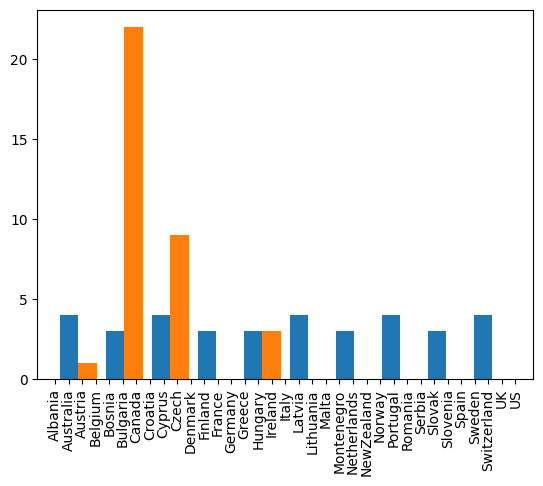

In [3]:
plt.hist(carbon_west)
plt.xticks(rotation='vertical')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [4]:
print(f"Mean: {carbon_west['CO2'].mean()}")
print(f"Median: {carbon_west['CO2'].median()}")
print(f"Standard Deviation: {carbon_west['CO2'].std()}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders_without_dc = murders[murders['state'] != 'DC']

Part a. Find the mean and standard deviation for murders without D.C.

In [6]:
print(f"Mean without DC: {murders_without_dc['murder'].mean()}")
print(f"Standard Deviation without DC: {murders_without_dc['murder'].std()}")
print(f"Median without DC: {murders_without_dc['murder'].median()}")

Mean without DC: 4.874
Standard Deviation without DC: 2.586291174793806
Median without DC: 4.85


Part b. Find the five-number  summary without D.C.

In [7]:
print(f"Minimum: {murders_without_dc['murder'].min()}")
print(f"25th percentile: {murders_without_dc['murder'].quantile(0.25)}")
print(f"50th percentile: {murders_without_dc['murder'].quantile(0.5)}")
print(f"75th percentile: {murders_without_dc['murder'].quantile(0.75)}")
print(f"Maximum: {murders_without_dc['murder'].max()}")

Minimum: 1.0
25th percentile: 2.625
50th percentile: 4.85
75th percentile: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
print(f"Mean with DC: {murders['murder'].mean()}")
print(f"Median with DC: {murders['murder'].median()}")
print(f"Minimum with DC: {murders['murder'].min()}")
print(f"25th percentile: {murders['murder'].quantile(0.25)}")
print(f"50th percentile: {murders['murder'].quantile(0.5)}")
print(f"75th percentile: {murders['murder'].quantile(0.75)}")
print(f"Maximum with DC: {murders['murder'].max()}")

Mean with DC: 5.252941176470588
Median with DC: 5.0
Minimum with DC: 1.0
25th percentile: 2.6500000000000004
50th percentile: 5.0
75th percentile: 6.45
Maximum with DC: 24.2


It seems that the mean is affected more by this outlier of DC. The median changed by 0.15 whereas the mean changed by almost 0.4. The range is affected a lot more by this outlier of DC, changing by 11.8 while the interquartile range changed only by 0.25.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [9]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [10]:
houses

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
...,...,...,...,...,...,...,...
95,96,264.00,1060,0,990,2,2
96,97,294.75,1730,0,3030,3,2
97,98,198.30,1370,0,1580,3,2
98,99,132.60,1560,0,1770,3,2


Part a. Construct a scatterplot between square feet and price of a home.

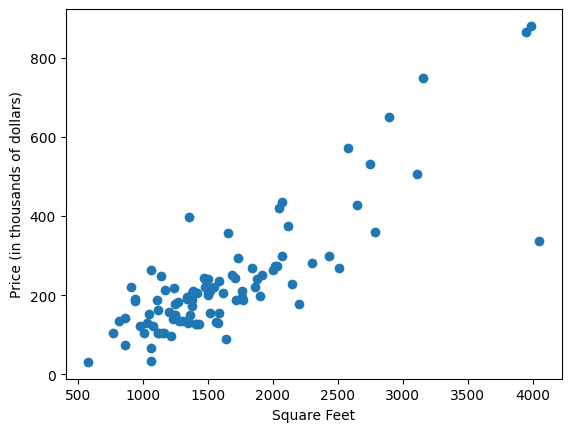

In [11]:
plt.scatter(houses["size"], houses["price"])
plt.xlabel("Square Feet")
plt.ylabel("Price (in thousands of dollars)")
plt.show()

Part b. Find the correlation between the two variables.

In [12]:
houses["size"].corr(houses["price"])

0.8337847885586537

Part c. Find and plot the regression line on top of the scatterplot.

In [13]:
from sklearn.linear_model import LinearRegression

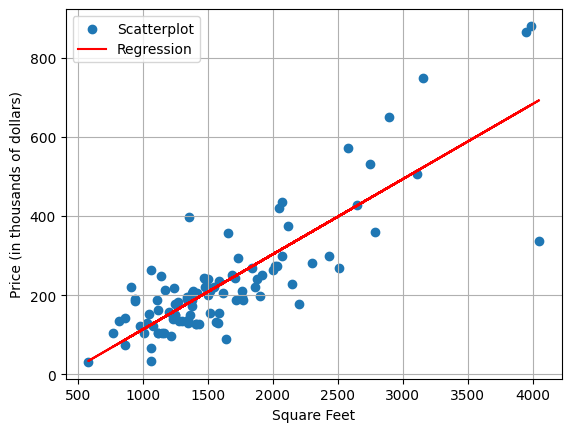

In [14]:
model = LinearRegression()
model.fit(houses[["size"]], houses[["price"]])

slope = model.coef_[0][0]
intercept = model.intercept_[0]

plt.scatter(houses["size"], houses["price"], label="Scatterplot")
plt.plot(houses["size"], model.predict(houses[["size"]]), color="red", label="Regression")
plt.xlabel("Square Feet")
plt.ylabel("Price (in thousands of dollars)")
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 640x480 with 0 Axes>

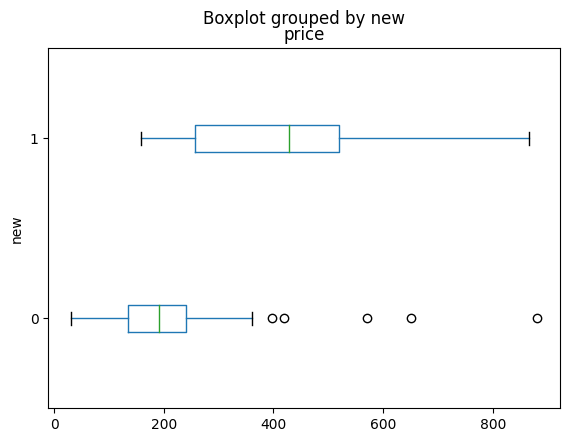

In [15]:
plt.figure()
houses.boxplot(column="price", by="new", grid=False, vert=False)
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong positive linear relationship between size and price, as we can see with the graph above showing the regression plotted along with the scatter plot of data points. Using the box plots in the figure directly above, however, it seems that the fact that a house is newer greatly ups the price of the house though there are many outliers with older houses that also fetch high prices. Seeing how compact the box plot for not new homes is compared to the new homes boxplot, I'd say that being a not new house does have a fairly strong coorelation with a lower price.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [16]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [17]:
import pandas as pd

In [18]:
pd.crosstab(happy["marital"], happy["happiness"])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
